# Web Scraping

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://en.wikipedia.org/wiki/List_of_highest-grossing_films#Highest-grossing_films_by_year"

response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")


tables = soup.find_all("table", {"class": "wikitable"})
highest_grossing_table = tables[2] 


rows = highest_grossing_table.find_all("tr")


movie_data = []


for row in rows[1:]: 
    cols = row.find_all(["th", "td"])
    if len(cols) < 5:
        continue  
    
    year = cols[0].text.strip()
    title = cols[1].text.strip() 
    worldwide_gross = cols[2].text.strip()
    budget = cols[3].text.strip() 

    movie_data.append([year, title, worldwide_gross, budget])


df = pd.DataFrame(movie_data, columns=["Year", "Title", "Worldwide Gross", "Budget"])


print(df)

     Year                     Title  \
0    1915     The Birth of a Nation   
1    1916               Intolerance   
2    1917                 Cleopatra   
3    1918                    Mickey   
4    1919           The Miracle Man   
..    ...                       ...   
106  2021   Spider-Man: No Way Home   
107  2022  Avatar: The Way of Water   
108  2023                    Barbie   
109  2024              Inside Out 2   
110  2025                Ne Zha 2 †   

                                       Worldwide Gross  \
0    $50,000,000–100,000,000$20,000,000+R ($5,200,0...   
1                                       $1,750,000R IN   
2                                           $500,000*R   
3                                           $8,000,000   
4                                          $3,000,000R   
..                                                 ...   
106                    $1,922,598,800 ($1,912,233,593)   
107                                     $2,320,250,281   
108      

In [5]:
df.to_csv("highest_grossing_movies_2.csv", index=False)

# Data Cleaning

In [7]:
df["Worldwide Gross"] = df["Worldwide Gross"].str.replace(r'[^\d.]', '', regex=True)
df["Budget"] = df["Budget"].str.replace(r'[^\d.]', '', regex=True)

df["Worldwide Gross"] = pd.to_numeric(df["Worldwide Gross"], errors='coerce')
df["Budget"] = pd.to_numeric(df["Budget"], errors='coerce')

In [9]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             111 non-null    object 
 1   Title            111 non-null    object 
 2   Worldwide Gross  111 non-null    float64
 3   Budget           111 non-null    float64
dtypes: float64(2), object(2)
memory usage: 3.6+ KB
None
   Year                  Title  Worldwide Gross    Budget
0  1915  The Birth of a Nation     5.000000e+31  110000.0
1  1916            Intolerance     1.750000e+06  385907.0
2  1917              Cleopatra     5.000000e+05  300000.0
3  1918                 Mickey     8.000000e+06  250000.0
4  1919        The Miracle Man     3.000000e+06  120000.0


In [13]:
df = df[df["Worldwide Gross"] < 1e10]

In [25]:
df["Year"] = df["Year"].astype(int)

# Data Visualization

## Highest Grossing Movies Over the Years

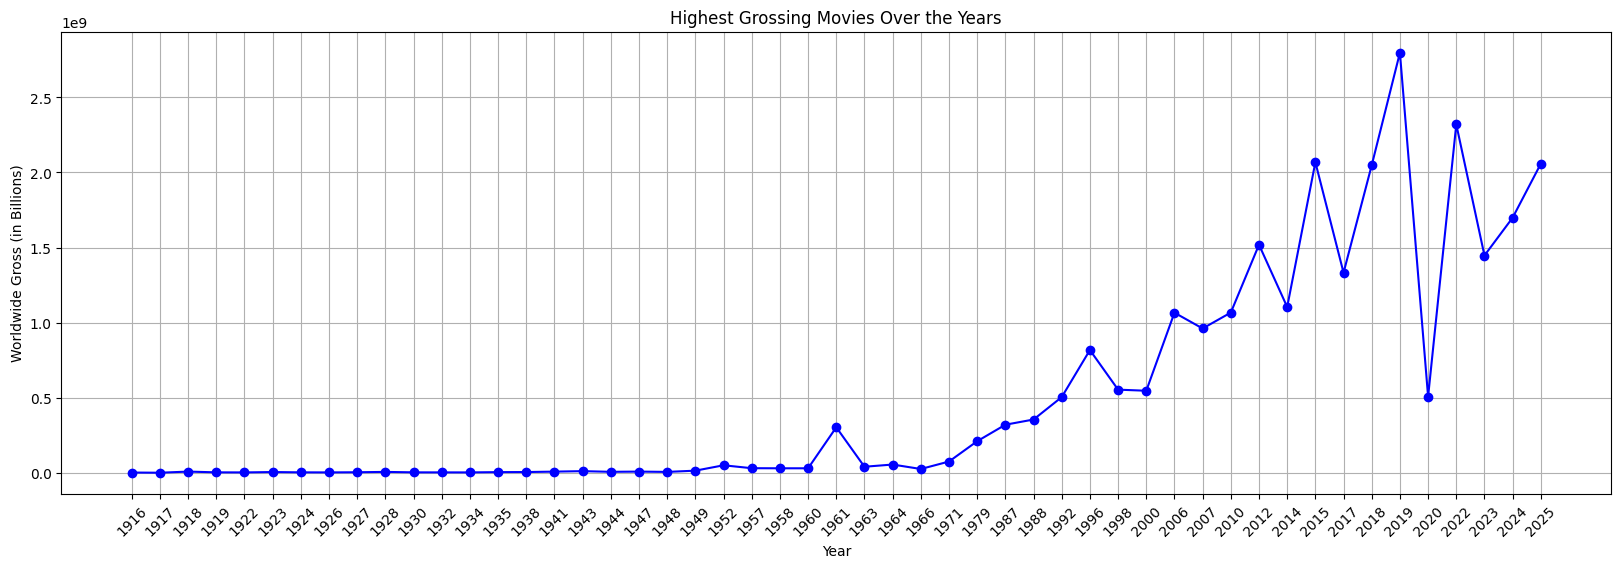

In [19]:
import matplotlib.pyplot as plt

df = df.sort_values(by="Year")

plt.figure(figsize=(20, 6))
plt.plot(df["Year"], df["Worldwide Gross"], marker="o", linestyle="-", color="b")

plt.xlabel("Year")
plt.ylabel("Worldwide Gross (in Billions)")
plt.title("Highest Grossing Movies Over the Years")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

## Count of Highest Grossing Movies by Decade

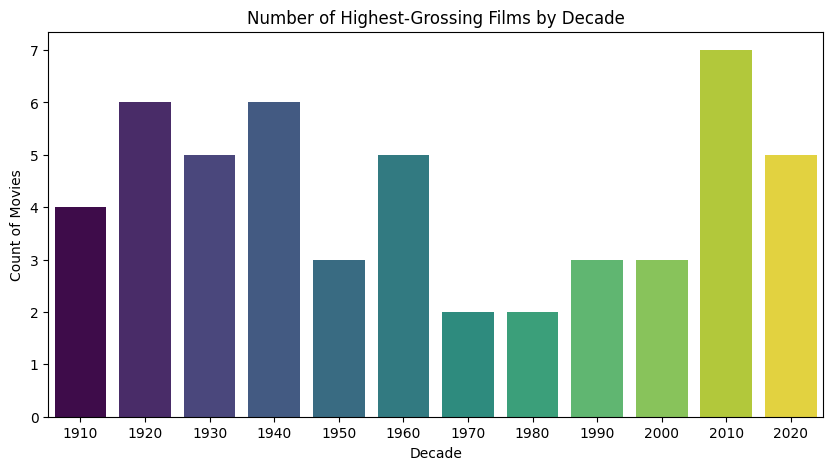

In [37]:
import seaborn as sns 

df["Decade"] = (df["Year"] // 10) * 10 

# Count movies in each decade
decade_counts = df["Decade"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=decade_counts.index, y=decade_counts.values, palette="viridis", hue=decade_counts.index, legend=False)
plt.title("Number of Highest-Grossing Films by Decade")
plt.xlabel("Decade")
plt.ylabel("Count of Movies")
plt.show()


## Budget Vs Worldwide Gross

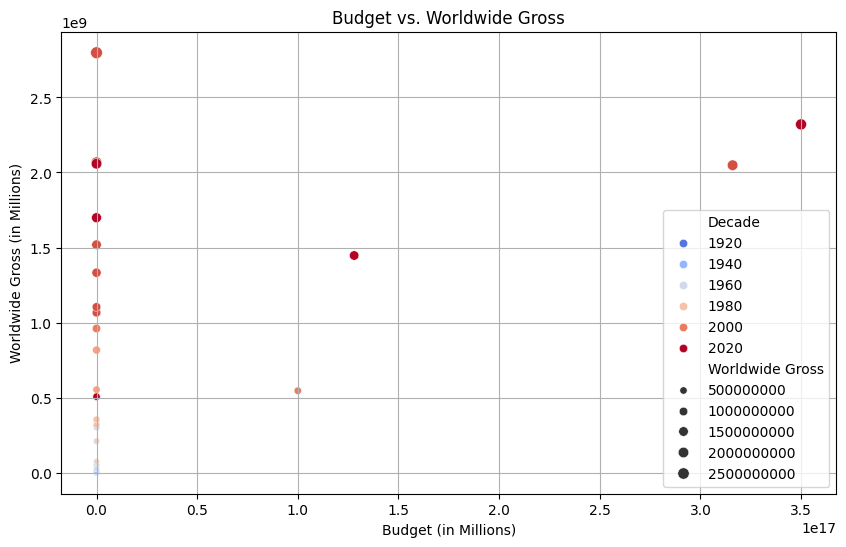

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Budget"], y=df["Worldwide Gross"], hue=df["Decade"], palette="coolwarm", size=df["Worldwide Gross"])
plt.title("Budget vs. Worldwide Gross")
plt.xlabel("Budget (in Millions)")
plt.ylabel("Worldwide Gross (in Millions)")
plt.grid()
plt.show()


## Top 10 Most Profitable Movies

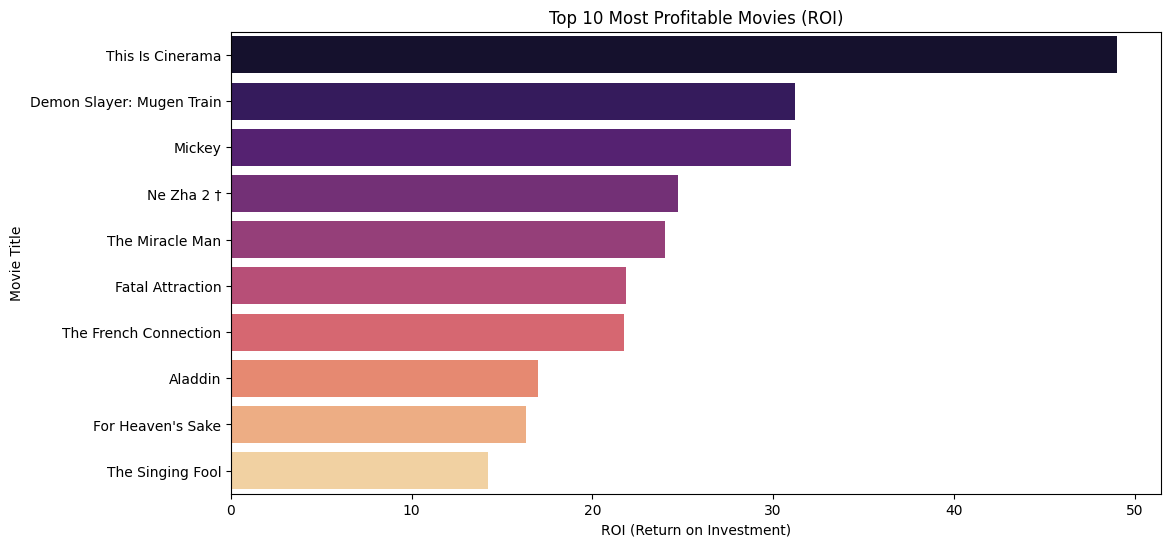

In [43]:
df["ROI"] = (df["Worldwide Gross"] - df["Budget"]) / df["Budget"]
top_roi = df.sort_values(by="ROI", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_roi["Title"], x=top_roi["ROI"], palette="magma", hue=top_roi["Title"], legend=False)
plt.title("Top 10 Most Profitable Movies (ROI)")
plt.xlabel("ROI (Return on Investment)")
plt.ylabel("Movie Title")
plt.show()


## Inflation-Adjusted Gross of Highest-Grossing Films

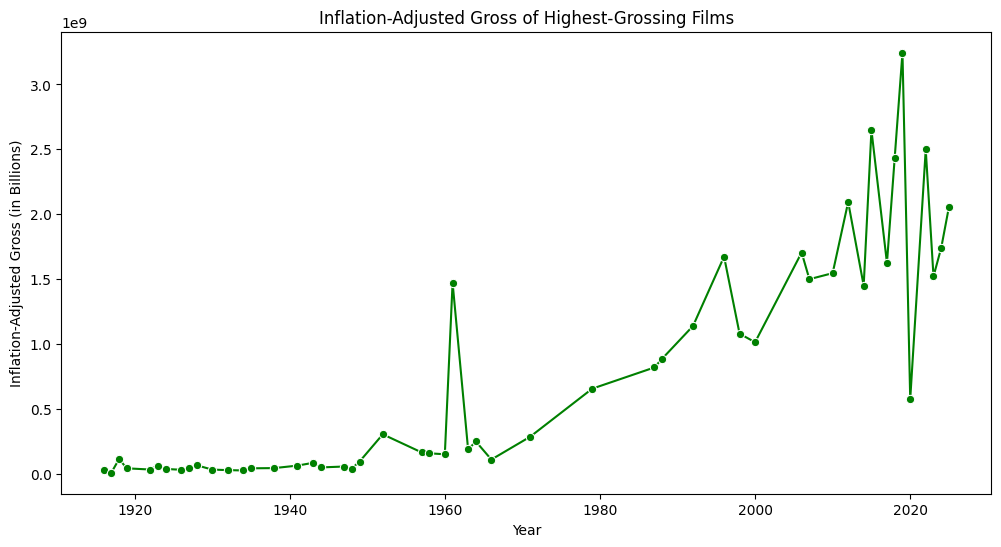

In [45]:
# Assuming an average inflation rate of 2.5% per year
df["Adjusted Gross"] = df["Worldwide Gross"] * (1.025 ** (2025 - df["Year"]))

plt.figure(figsize=(12, 6))
sns.lineplot(x=df["Year"], y=df["Adjusted Gross"], marker="o", color="green")
plt.title("Inflation-Adjusted Gross of Highest-Grossing Films")
plt.xlabel("Year")
plt.ylabel("Inflation-Adjusted Gross (in Billions)")
plt.show()


## Average Return of Investment per Decade

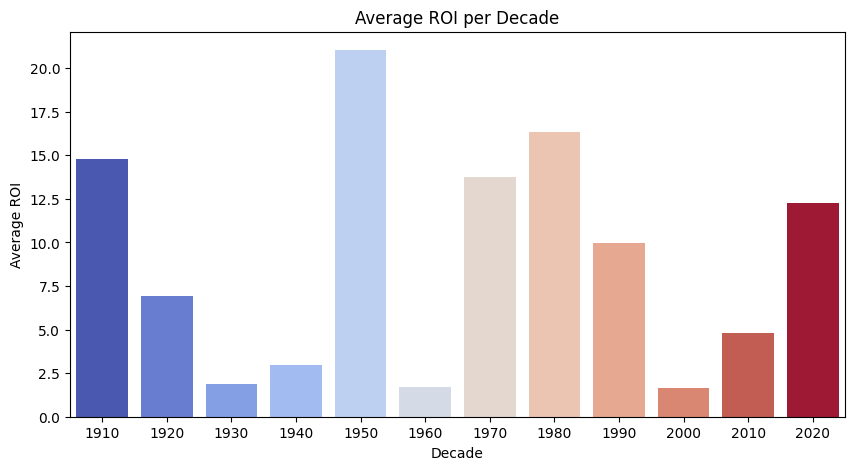

In [51]:
decade_roi = df.groupby("Decade")["ROI"].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=decade_roi.index, y=decade_roi.values, palette="coolwarm", hue=decade_roi.index, legend=False)
plt.title("Average ROI per Decade")
plt.xlabel("Decade")
plt.ylabel("Average ROI")
plt.show()
